<a href="https://colab.research.google.com/github/velamalaappu/icc-project-analysis/blob/main/MODULE_3_Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

# Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Path of data in drive
data_path='/content/drive/MyDrive/MODULE 3/data_email_campaign.csv'
#Reading csv file
email_data=pd.read_csv(data_path)

In [ ]:
#Data
email_data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


**The data has the following features**:

**Email_ID** - This column contains the email ids of individuals.

**Email_type -** Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

**Subject_Hotness_Score -** It is the subject-line effectiveness score.

**Email_Source -** It represents the source of the email like sales,marketing or product type email.

**Email_Campaign_Type -** Campaign type

**Total_Past_Communications -** This column contains the previous mails from the source.

**Customer_Location -** Categorical data which explains the different demographic location of the customers.

**Time_Email_sent_Category -** It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

Word_Count-  It contains the no.of words in the mail.

**Total_Links -** Total links in the email body.

**Total_Images -** The banner images in the email body.

**Email_Status - **It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

**Exploratory Data Analysis**

In [ ]:
#Retreiving Column names
email_data.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
#getting the shape of dataset
email_data.shape

(68353, 12)

In [ ]:
#Check for any duplicates data
email_data.duplicated().sum()

0

Hence, we can observe that there are no duplications of data.

In [ ]:
email_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [ ]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

From the above data we realise that 4 features have null values. Will be handling it in the upcoming Data Cleaning section.


**Analysis of Categorical data**

In [ ]:
#creating new dataframe of only categorical columns
ds_cat = email_data.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
ds_cat.drop('Word_Count',axis=1,inplace=True)
ds_cat.head(2)

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0


In [ ]:
ds_cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in ds_cat.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [ds_cat[c].unique()]
    tmp['Total Count'] = len(list(ds_cat[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(ds_cat[c].nunique())
    tmp['Missing Value'] = ds_cat[c].isnull().sum()
    tmp['Missing %'] = (ds_cat[c].isnull().sum()/ len(ds_cat)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,0,0.0
0,Email_Type,"[1, 2]",2,2,0,0.0
0,Email_Source_Type,"[2, 1]",2,2,0,0.0
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,11595,17.0
0,Email_Campaign_Type,"[2, 3, 1]",3,3,0,0.0
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,0,0.0
0,Email_Status,"[0, 1, 2]",3,3,0,0.0


As we can see we have 17% missing values in Customer 
Location.

There is no missing values in any other categorical variable.

Email_Type and Email_Source_Type have 2 categories.

Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories

Look at the Variable 'Customer_Location' -- distinct categories are 8 but without nans it is 7.

**Since we are working on a Multi-Class Classification problem we should also look at the relationship between the dependent variable and independent variable**

In [ ]:
#Dropping Email_ID column
ds_cat.drop('Email_ID',axis=1,inplace=True)

In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

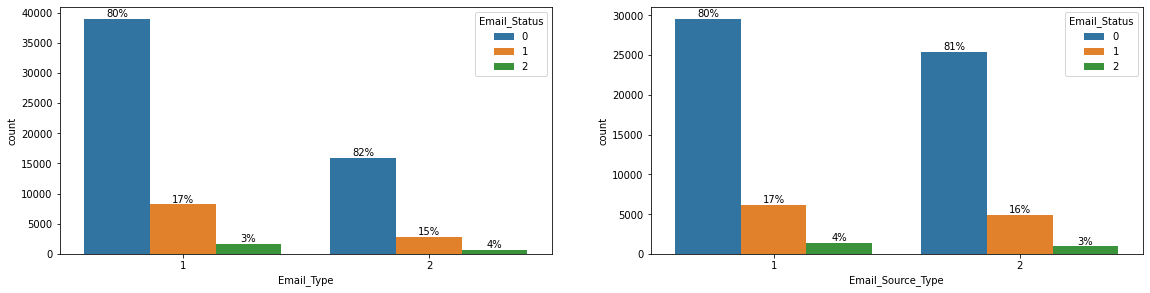

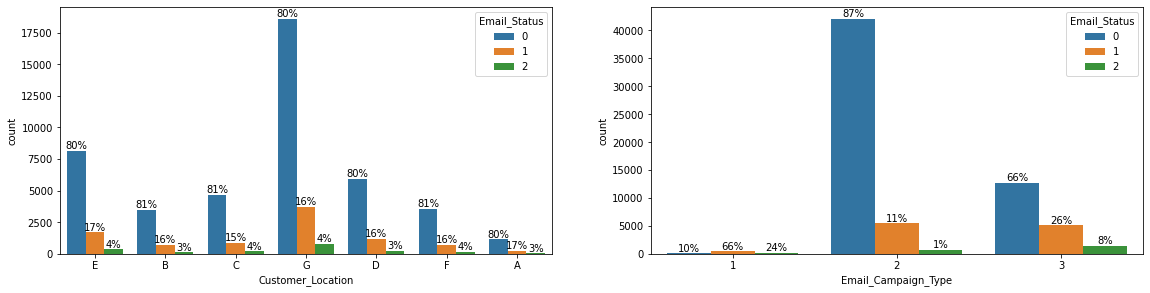

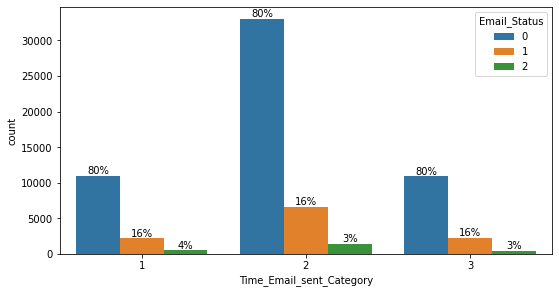

<Figure size 2160x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(ds_cat.columns):
    if ix < 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = ds_cat, x=c,hue='Email_Status' ,ax = ax1)
            barPerc(ds_cat,c,ax1)            
    ix = ix +1
    if ix == 3: 
        fig = plt.figure(figsize = (30,10))
        ix =1

**As we can observe the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type we can see that it shows a totally different trend . For Email_Campaign_Type=1 we see that only 10% of customers are ignoring the email and for 2 around 87% customer ignore the emails.**

### **Analysis of Numerical Data**

In [ ]:
#creating new dataframe of only numerical columns
ds_num = email_data.select_dtypes(include =['float']).copy()
ds_num['Word_Count'] = email_data.loc[ds_num.index, 'Word_Count'].copy()
ds_num.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.2,33.0,8.0,0.0,440
1,2.1,15.0,5.0,0.0,504


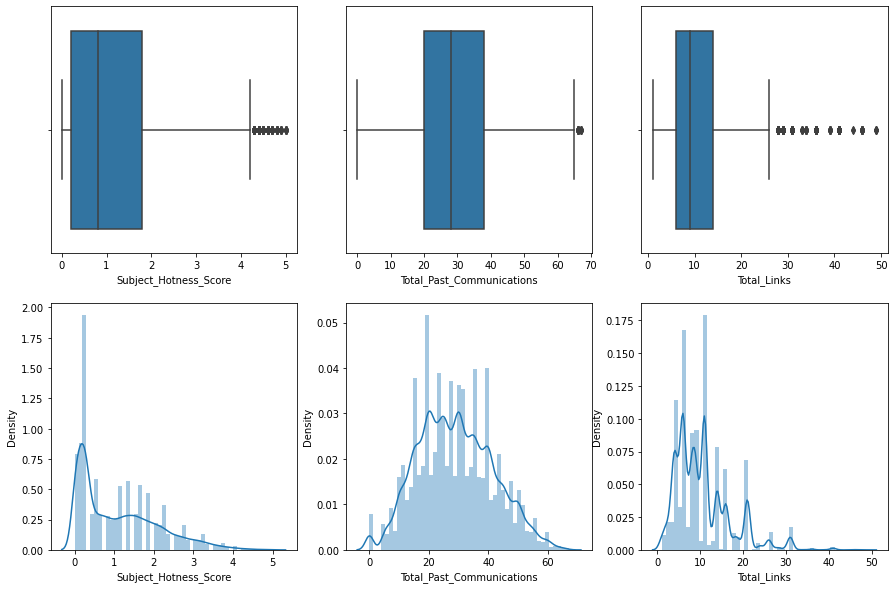

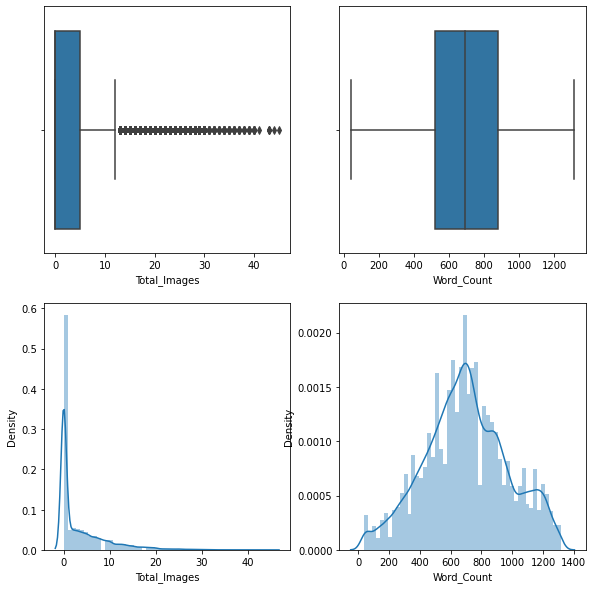

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_num.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = ds_num, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(ds_num[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

There are outliers in Subject_Hotness_Score,Total_Links and Total_Images and the distribution of these features are right skewed in nature. There are also a few outliers in Total_Past_Communication which has a normal distribution .

### Lets look at the relationship between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.

In [ ]:
ds_num['Email_Status'] = email_data.loc[ds_num.index, 'Email_Status'].copy()


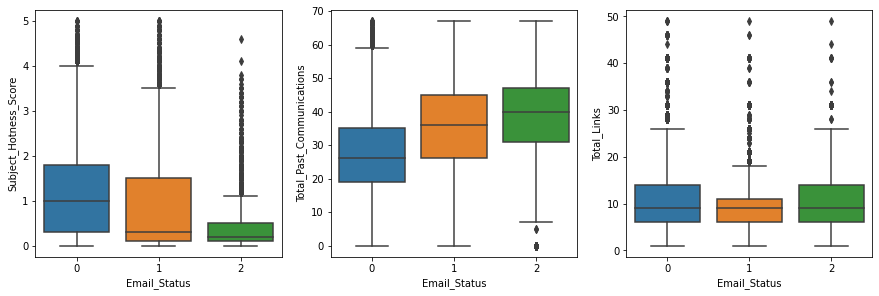

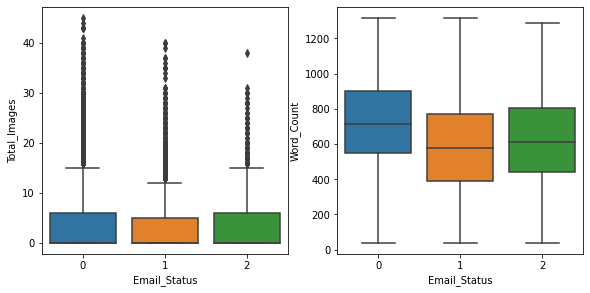

<Figure size 1080x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_num.columns):
    if ix <= 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=ds_num, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

**Subject_Hotness_Score ->**All Email_Status i.e 0,1,2 have outliers. 0 have highest median and 1,2 are right skewed. It is observed that the Subject_Hotness_Score for read/acknowledged mails are much lower.

**Total_Past_Communications ->** 0,2 have outliers and 2 have highest median .

**Total_Links ->**0,1,2 all have outliers,All have the same median but 0,2 have higher variance compare to 1.

**Total_Images ->**0,1,2 all have outliers and All have the same median. Hence all the mails have the same range of images.

**Word_Count ->**Median of 0 is highest. Thus we can understand that ignored mails have higher word count.

## **Lets see the correlation of numerical variables**

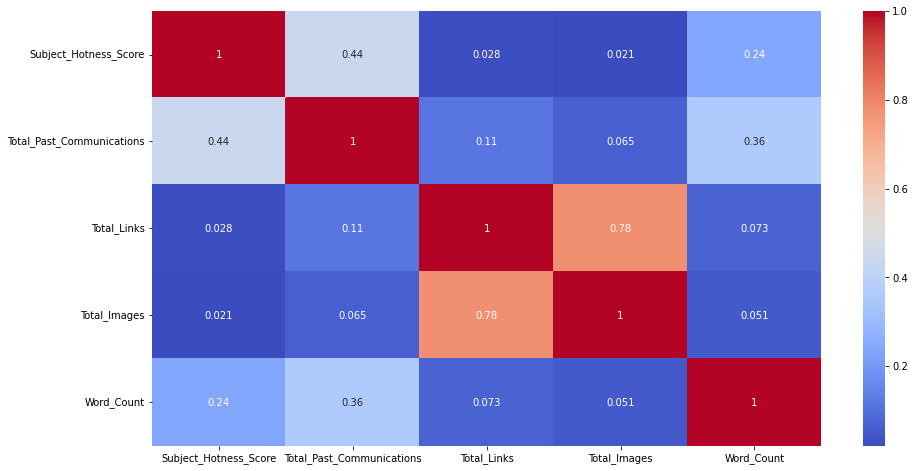

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = ds_num.drop('Email_Status',axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can observe that there is a relationship between Total_Images and Total_Links, they have 78% positive correlation. To understand if this relation holds true, we try and validate with a lmplot b/w the two features.

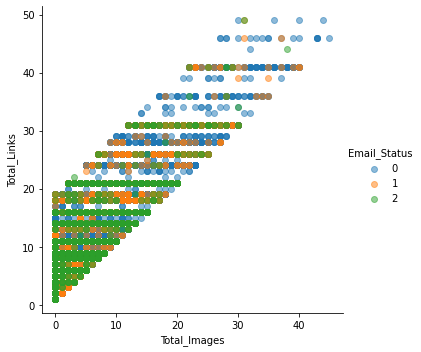

In [ ]:
sns.lmplot(x='Total_Images', y='Total_Links', hue='Email_Status', data=email_data, fit_reg=False, scatter_kws={'alpha':0.5})

We can conclude from the above information that there is a high positive correlation between these two features. Lets now understand each feature individually.



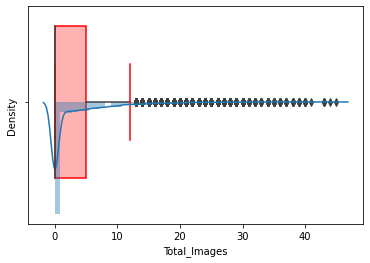

In [ ]:
ax=sns.boxplot(ds_num['Total_Images'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(ds_num['Total_Images'])

More than 50% of values are 0 and there are there is a presence of outliers in Total_Images

In [ ]:
#Finding number of data having 0 images
img_cnt_0=ds_num[ds_num['Total_Images']==0].count()['Total_Images']
#Total number of non nan data
total=ds_num['Total_Images'].count()
#finding percentage
pcnt_img_0=(img_cnt_0/total)*100
print("Percentage of data having Total_Images Zero is = ",pcnt_img_0)


Percentage of data having Total_Images Zero is =  52.58263843061971


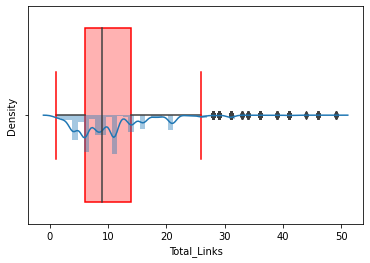

In [ ]:
ax=sns.boxplot(ds_num['Total_Links'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(ds_num['Total_Links'])


Compared to Total_Images, Total_Links has very few outliers.
Since images and links are correlated and most of the values in Total_Images is 0 we will combine both the features.
Before that we need to see if there is any null values in this column .

In [ ]:
# Number of NaNs for each object
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Since there are null values we need to impute them individually after that we can combine Total_Links and Total_Images

## **Null Value Imputation**

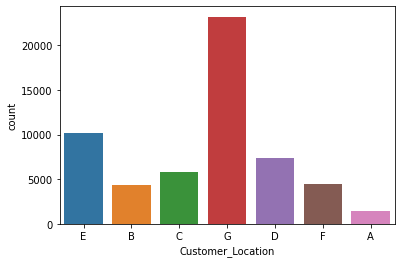

In [ ]:
#Visualizing Customer_Location
sns.countplot(email_data['Customer_Location'])

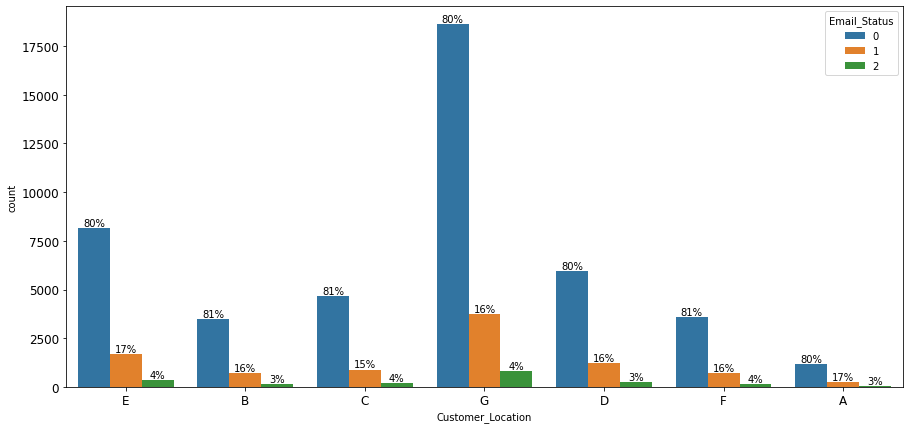

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(email_data['Customer_Location'],hue=email_data['Email_Status'])
plt.xticks(size=12)
plt.yticks(size=12)
barPerc(email_data,'Customer_Location',ax)

As we can see irrespective of location the ratio of Email_Status is same throughout .So we can drop the location column

In [ ]:
print('Shape of data before dropping ',email_data.shape)
#dropping Customer_Location column
email_data.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)


Shape of data before dropping  (68353, 12)
Shape of data after dropping  (68353, 11)


Lets find out which metrics we should use to fill missing values of Total_Past_Communications column

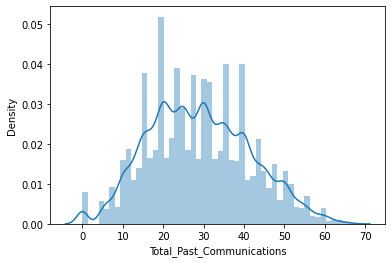

In [ ]:
sns.distplot(email_data.Total_Past_Communications)

As we can observe the data is symmetricaly distributed so we can use mean value for imputing missing values

In [ ]:
print('Number of missing values before imputing is = ',email_data['Total_Past_Communications'].isnull().sum())
email_data['Total_Past_Communications'].fillna(email_data['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


Now lets find out which metrics we should use to fill missing values of Total_Links column

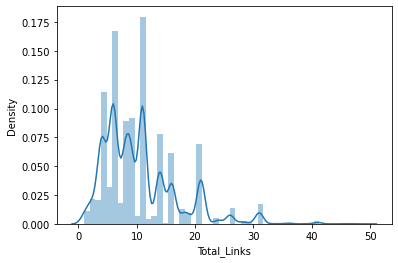

In [ ]:
sns.distplot(email_data.Total_Links)

Since the data is not normally distributed we will use Mode to impute missing value

In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_data['Total_Links'].isnull().sum())
email_data['Total_Links'].fillna(email_data['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Links'].isnull().sum())


Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0


Now lets find out which metrics we should use to fill missing values of Total_Images column

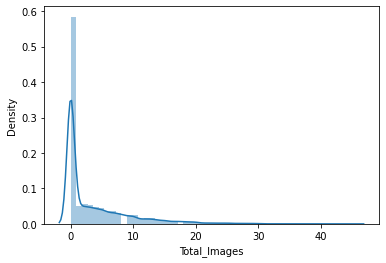

In [ ]:
sns.distplot(email_data.Total_Images)

Since the data is not normally distributed we will use Mode to impute missing value

In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_data['Total_Images'].isnull().sum())
email_data['Total_Images'].fillna(email_data['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Images'].isnull().sum())


Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


In [ ]:
email_data.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

Now we have no missing values, So we can combine Links and Images column into one.

In [ ]:
email_data['Links_Images']=email_data['Total_Links']+email_data['Total_Images']

In [ ]:
#Dropping Total_Images and Total_Links  column
print('Shape of data before dropping ',email_data.shape)
email_data.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)

Shape of data before dropping  (68353, 12)
Shape of data after dropping  (68353, 10)


# **Feature Engineering**

Lets understand the multicollinearity within the numerical featrures.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(email_data[[i for i in email_data.describe().columns if i not in ['Email_ID','Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Total_Links','Total_Images','Email_Status']]])


,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Links_Images,2.629047


Here, the VIF is within acceptable limits i.e. VIF<5 . Hence multicollinearity is not a major issue for our data

# **Outlier Treatment**

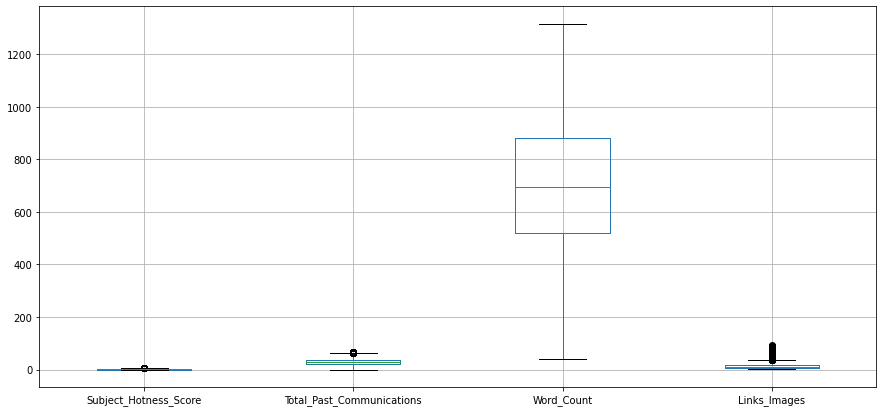

In [ ]:
#Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(15,7))
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
email_data.boxplot(numerical_col)

Except Word_Count column all other numeric column have outliers. Since our dependent variable is highly imbalanced so before dropping outliers we should check that it will not going to delete more than 5% of minority class which is Email_Status =1,2

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Links_Images': {0: 3061, 1: 437, 2: 122}}


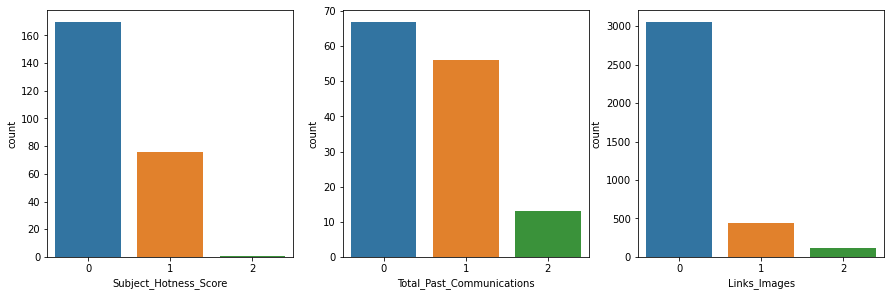

In [ ]:
#removing Word_Count because it does'nt have outlier
numerical_col.remove('Word_Count')

fig = plt.figure(figsize = (15,10))
ix = 1
#dictionary d to store the count of each email_status 
d={}
#iterating through each column which have outlier
for x in [y for y in numerical_col]:
    #Finding Quartile
    q75,q25 = np.percentile(email_data.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    intr_qr = q75-q25
    #Fixing Boundaries for outliers
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    #list y to store email_status of only outliers
    y=[]
    y=email_data.loc[email_data[x] < min]['Email_Status'].tolist()
    y.append(email_data.loc[email_data[x] > max]['Email_Status'].tolist()) 
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)      
    ix = ix +1
print(d)

In [ ]:
#finding the percentage of minority classs going to be affected by outliers
sum_min=0
sum_maj=0
for x in [y for y in numerical_col]:
  sum_min+=d[x][1]
  sum_min+=d[x][2]
  sum_maj+=d[x][0]
total=email_data.groupby('Email_Status').count()['Email_Type'][1]+email_data.groupby('Email_Status').count()['Email_Type'][2]
total_0=email_data.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_maj/total_0)
print("Percentage of minority class having outliers = ",100*sum_min/total)


Percentage of majority class having outliers =  6.002803006861907
Percentage of minority class having outliers =  5.256486728303012


Since more than 5% of minority classes will be removed if we delete outliers and we don't want that so we will keep it as it is.

In [ ]:
#Dropping Email_ID column
print('Shape of data before dropping ',email_data.shape)
email_data.drop('Email_ID',inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)

Shape of data before dropping  (68353, 10)
Shape of data after dropping  (68353, 9)


Now we are done with outlier treatment and missing value imputation lets move on to our dependent variable

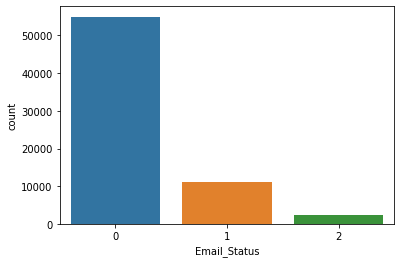

In [ ]:
sns.countplot(email_data['Email_Status'])

In [ ]:
email_data.groupby('Email_Status').count()['Email_Type']

Email_Status
0    54941
1    11039
2     2373
Name: Email_Type, dtype: int64

Dependent variable is highly imbalanced . Before treating that lets normalize our data

# **Feature Normalization**

In [ ]:
# apply normalization techniques
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
for column in numerical_col:
    email_data[column] = (email_data[column] - email_data[column].min()) / (email_data[column].max() - email_data[column].min())

In [ ]:
email_data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,3,0.268657,2,0.710815,0,0.032609


Lets visualize our normalized data

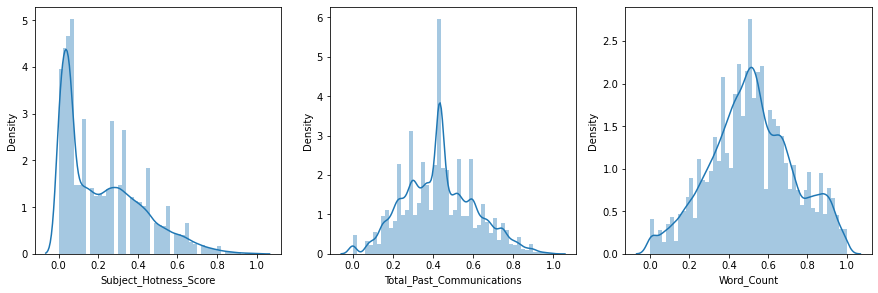

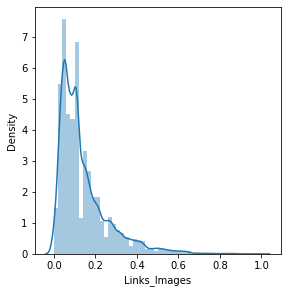

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in numerical_col:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.distplot(email_data[c], ax=ax1)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

Now we are done with scaling ,it's time to perform one-hot encoding on our categorical data.

## **One hot encoding**

In [ ]:
email_data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,3,0.268657,2,0.710815,0,0.032609


In [ ]:
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']
email_data=pd.get_dummies(email_data, columns=cat_col)
email_data.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
email_data.drop('Email_Source_Type_2',axis=1,inplace=True)

In [ ]:
#Pushing Email_Status at last of the DataFrame
list_of_col=list(email_data.columns)
list_of_col.remove('Email_Status')
list_of_col.append('Email_Status')
list_of_col
email_data=email_data[list_of_col]
email_data.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,1,0,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0,1,0,0


# **Feature Importance**

In [ ]:
def compute_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)   
    return(round(impurity, 3))

In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - feature_remaining_impurity
    

    return(information_gain)

Subject_Hotness_Score : 0.03815999999999997
Total_Past_Communications : 0.08543499999999993
Word_Count : 0.04493199999999986
Links_Images : 0.023570999999999898
Email_Type_1 : 0.00040000000000006697
Email_Source_Type_1 : 4.899999999996574e-05
Email_Campaign_Type_1 : 0.017567
Email_Campaign_Type_2 : 0.050541999999999976
Email_Campaign_Type_3 : 0.03729300000000002
Time_Email_sent_Category_1 : -0.0008010000000000517
Time_Email_sent_Category_2 : -0.0006019999999999914
Time_Email_sent_Category_3 : 0.0


Text(0.5, 1.0, 'Feature Importance')

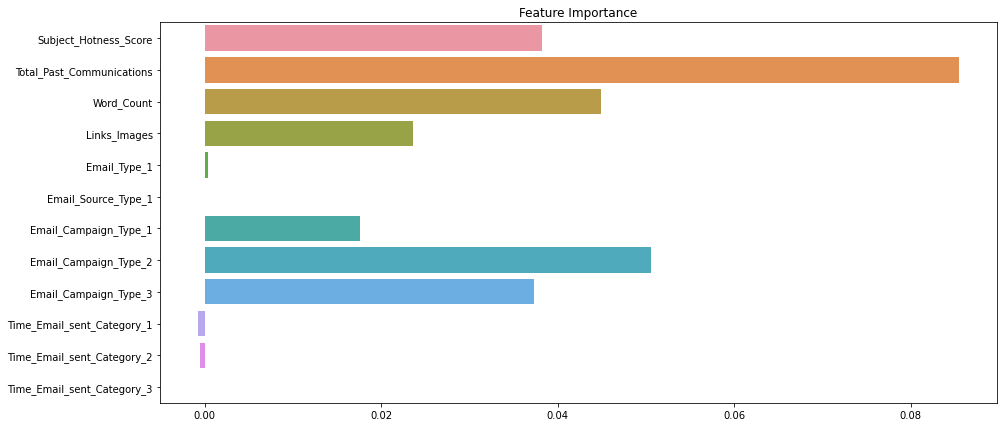

In [ ]:
info_gain={}
for feature in email_data.drop(columns='Email_Status').columns:
    feature_info_gain = comp_feature_information_gain(email_data, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

We can observe that Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3 have very less importance we can drop this feature

In [ ]:
drop=['Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3']
email_data.drop(drop,inplace=True,axis=1)

In [ ]:
email_data.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44,0.492537,0.31348,0.076087,1,0,0,1,0,0


## **Imbalance Handling**

## **Random Under Sampling**

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(email_data.iloc[:,0:-1], email_data['Email_Status'])

print('Original dataset shape:', len(email_data))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 68353
Resampled dataset shape 7119


Text(0.5, 1.0, 'Before Undersampling')

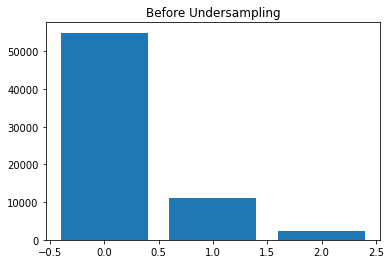

In [ ]:
plt.bar(Counter(email_data['Email_Status']).keys(), Counter(email_data['Email_Status']).values())
plt.title("Before Undersampling")

Text(0.5, 1.0, 'After Undersampling')

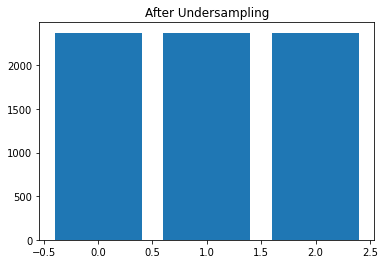

In [ ]:
plt.bar(Counter(y_rus).keys(), Counter(y_rus).values())
plt.title("After Undersampling")

In [ ]:
unique_elements, counts_elements = np.unique(y_rus, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[   0    1    2]
 [2373 2373 2373]]


Now we have a total balanced data with 2373 records for each class.

**Splitting the dataset into the Training set and Test set**

In [ ]:
X_train_fs, X_test_fs, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 3,stratify=y_rus)

Taking a 80-20 train test split.
We need to use the stratify parameter inorder to make sure that the train and test datasets have the same ratios of the predictor variables.

## **Decision Tree Model**

In [ ]:
# Initializing the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [ ]:
# Fitting onto the train set
dt_classifier.fit(X_train_fs,y_train)

In [ ]:
#Creating dataframe for storing model evaluated metrics.
column_name=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model=pd.DataFrame(columns=column_name)

In [ ]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  res = {column_name[i]: list_score[i] for i in range(len(column_name))}
  

  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return res

In [ ]:
final_list=[]

----- Evaluation on train data -----

Confusion matrix 

[[1898    0    0]
 [   0 1898    1]
 [   0    4 1894]]

 Accuracy =  0.9991220368744512

 Recall =  0.9991220368744512

 Precision =  0.9991228667313098

 F1 score =  0.9991220361436879

 Roc_Auc score =  0.9999983813505406


----- Evaluation on test data -----

Confusion matrix 

[[255 136  84]
 [105 218 151]
 [110 149 216]]

 Accuracy =  0.48384831460674155

 Recall =  0.48384831460674155

 Precision =  0.4849990409066091

 F1 score =  0.4841830403222317

 Roc_Auc score =  0.6128266457962185


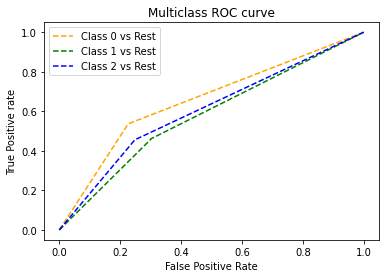

In [ ]:
# Evaluation of our decision tree model
res=evaluate(dt_classifier,X_train_fs,y_train,X_test_fs,y_test,'Decision_Tree_On_Under_Sampled_data')
final_list.append(res)

We can observe that model is overfitting since it's performing really well on training set but not that good on unseen data. Lets find what can be the reason by implimenting other algorithm.

### **SVM Model**

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)

# Fitting on the train set
svc_model.fit(X_train_fs,y_train)

SVC(probability=True)

----- Evaluation on train data -----

Confusion matrix 

[[1346  188  364]
 [ 636  390  873]
 [ 333  246 1319]]

 Accuracy =  0.5364354697102721

 Recall =  0.5364354697102721

 Precision =  0.5235802182547129

 F1 score =  0.5058614584700288

 Roc_Auc score =  0.7224187306264215


----- Evaluation on test data -----

Confusion matrix 

[[326  39 110]
 [156  94 224]
 [103  63 309]]

 Accuracy =  0.511938202247191

 Recall =  0.511938202247191

 Precision =  0.5058239650387089

 F1 score =  0.48296339920933534

 Roc_Auc score =  0.7025600916564931


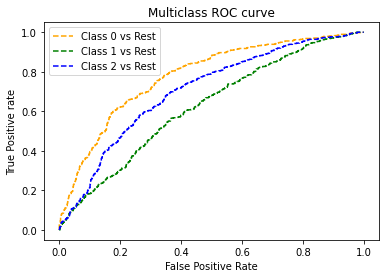

In [ ]:
# Evaluating the SVM Model
res=evaluate(svc_model,X_train_fs,y_train,X_test_fs,y_test,'SVM_On_Under_Sampled_Data')
final_list.append(res)

So SVM is not overfitting and the previous model which was Decision Tree was overfitted because of the depth of the tree , but still SVM is not giving good results lets hypertune it to get the best parameters .

## **Hypertuning SVM Model**

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 100], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_fs, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   7.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   7.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   8.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   7.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   7.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.498 total time=   8.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   8.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.492 total time=   9.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.491 total time=   8.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   8.1s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.533 total time=  13.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;,

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 100], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1, probability=True)


----- Evaluation on train data -----

Confusion matrix 

[[1384  209  305]
 [ 619  525  755]
 [ 302  291 1305]]

 Accuracy =  0.5643546971027217

 Recall =  0.5643546971027217

 Precision =  0.5548011845756396

 F1 score =  0.5432740648547688

 Roc_Auc score =  0.7454278165365289


----- Evaluation on test data -----

Confusion matrix 

[[335  56  84]
 [147 126 201]
 [101  84 290]]

 Accuracy =  0.5273876404494382

 Recall =  0.5273876404494382

 Precision =  0.5175795043127296

 F1 score =  0.5088487157610052

 Roc_Auc score =  0.7065321483761245


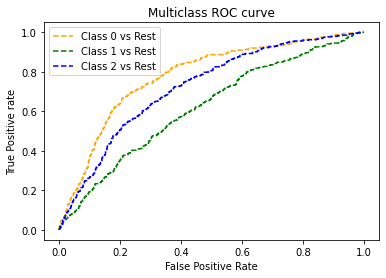

In [ ]:
# Evaluating the tuned model
res=evaluate(grid,X_train_fs,y_train,X_test_fs,y_test,'Hypertuned_SVM_On_Under_Sampled_data')
final_list.append(res)

We get better results from previously but still it's not good , it's because of loss of information due to under sampling lets try different sampling techniques and than apply model.


## **Synthetic Minority Oversampling Technique (SMOTE)**

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



In [ ]:
email_data.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(email_data.iloc[:,0:-1], email_data['Email_Status'])

print('Original dataset shape', len(email_data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 68353
Resampled dataset shape 164823


Text(0.5, 1.0, 'Before SMOTE')

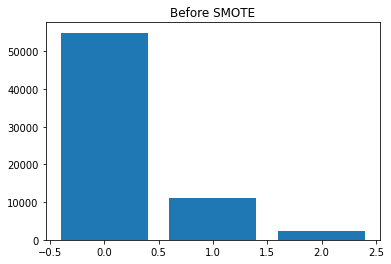

In [ ]:
plt.bar(Counter(email_data['Email_Status']).keys(), Counter(email_data['Email_Status']).values())
plt.title("Before SMOTE")

Text(0.5, 1.0, 'After SMOTE')

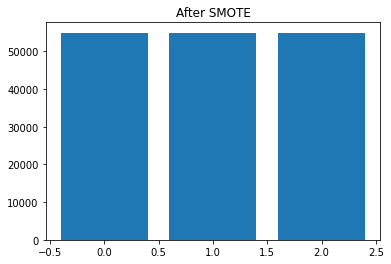

In [ ]:
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")

In [ ]:
unique_elements, counts_elements = np.unique(y_smote, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[    0     1     2]
 [54941 54941 54941]]


Now we have a total balanced data with 54941 records for each class.

In [ ]:
#Split data into train and test
X_train_fs, X_test_fs, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3,stratify=y_smote)


We are ready with our data lets try our baseline model Decision Tree and see the difference.

## **Decision Tree**

In [ ]:
# Fit the decision tree model
dt_classifier_smote = DecisionTreeClassifier()
dt_classifier_smote.fit(X_train_fs,y_train)

DecisionTreeClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[43952     1     0]
 [  112 43840     1]
 [   32    31 43889]]

 Accuracy =  0.9986576468625339

 Recall =  0.9986576468625339

 Precision =  0.9986607296299564

 F1 score =  0.9986578614494617

 Roc_Auc score =  0.9999980082915106


----- Evaluation on test data -----

Confusion matrix 

[[8750 1788  450]
 [1478 8146 1364]
 [ 352 1217 9420]]

 Accuracy =  0.7983012285757621

 Recall =  0.7983012285757621

 Precision =  0.798693035706467

 F1 score =  0.7983526653581624

 Roc_Auc score =  0.8490496594175795


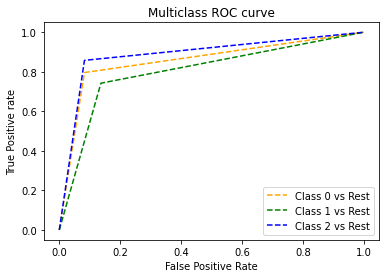

In [ ]:
# Evaluate the results
res=evaluate(dt_classifier_smote,X_train_fs,y_train,X_test_fs,y_test,'Decision_Tree')
final_list.append(res)

We can observe the results are better on this data compare to Under Sample Data.

# **XGBoost**

In [ ]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)

In [ ]:
# Fit the model
xgb_model.fit(X_train_fs,y_train)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on train data -----

Confusion matrix 

[[42427  1196   330]
 [ 4390 35546  4017]
 [  722   911 42319]]

 Accuracy =  0.9122844271868222

 Recall =  0.9122844271868222

 Precision =  0.9144525743739285

 F1 score =  0.9108722707204471

 Roc_Auc score =  0.983317786180928


----- Evaluation on test data -----

Confusion matrix 

[[10171   670   147]
 [ 1481  7607  1900]
 [  294   765  9930]]

 Accuracy =  0.8405278325496739

 Recall =  0.8405278325496739

 Precision =  0.8405996375850232

 F1 score =  0.8370999341192731

 Roc_Auc score =  0.9472630363561402


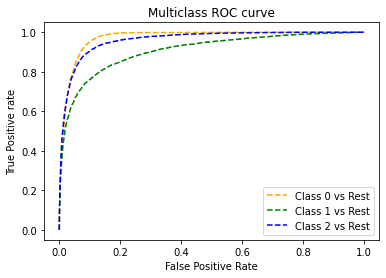

In [ ]:
# Evaluate the results
res=evaluate(xgb_model,X_train_fs,y_train,X_test_fs,y_test,'XGBoost')
final_list.append(res)

We have Good F1 score for both training and testing data using XGBoost model.

## **Naive Bayes Classifier**

In [ ]:
# Importing the packages
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Instantiating all the models.
gausian = GaussianNB()
bernoulli = BernoulliNB()
multinomial = MultinomialNB()

# **1) Gaussian**

In [ ]:
# Fit the model
gausian.fit(X_train_fs,y_train)

GaussianNB()

----- Evaluation on train data -----

Confusion matrix 

[[34682    99  9172]
 [21800   302 21851]
 [13225   296 30431]]

 Accuracy =  0.49610186716012683

 Recall =  0.49610186716012683

 Precision =  0.4753360496213967

 F1 score =  0.4004017106077362

 Roc_Auc score =  0.6830457557534606


----- Evaluation on test data -----

Confusion matrix 

[[8786   31 2171]
 [5464   64 5460]
 [3334   87 7568]]

 Accuracy =  0.4980433793417261

 Recall =  0.4980433793417261

 Precision =  0.449746337492267

 F1 score =  0.4014858908555377

 Roc_Auc score =  0.6846799173165964


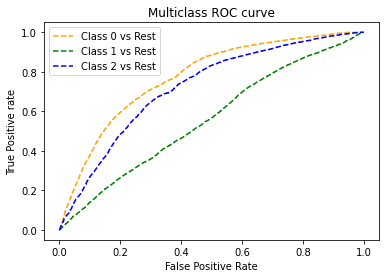

In [ ]:
# Evaluate results
res=evaluate(gausian,X_train_fs,y_train,X_test_fs,y_test,'Gaussian')
final_list.append(res)

## **2) Bernoulli**

In [ ]:
# Fit model
bernoulli.fit(X_train_fs,y_train)

BernoulliNB()

----- Evaluation on train data -----

Confusion matrix 

[[33580    36 10337]
 [21691    97 22165]
 [13257    22 30673]]

 Accuracy =  0.4880249965872378

 Recall =  0.4880249965872378

 Precision =  0.5337835217468182

 F1 score =  0.39137340234369805

 Roc_Auc score =  0.638888226641576


----- Evaluation on test data -----

Confusion matrix 

[[8535   11 2442]
 [5439   33 5516]
 [3338    4 7647]]

 Accuracy =  0.49188533292886394

 Recall =  0.49188533292886394

 Precision =  0.5568465977290219

 F1 score =  0.3947563926034826

 Roc_Auc score =  0.6456355366638379


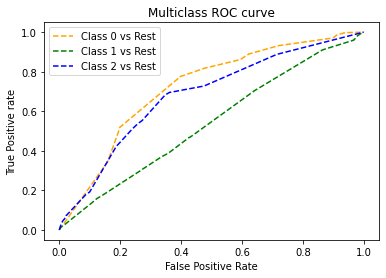

In [ ]:
# Evaluate model
res=evaluate(bernoulli,X_train_fs,y_train,X_test_fs,y_test,'Bernoulli')
final_list.append(res)

# **3) Multinomial**

In [ ]:
# Fit the train set
multinomial.fit(X_train_fs,y_train)

MultinomialNB()

----- Evaluation on train data -----

Confusion matrix 

[[33580     0 10373]
 [21691     0 22262]
 [13257     0 30695]]

 Accuracy =  0.48745620288492164

 Recall =  0.48745620288492164

 Precision =  0.32489948251670536

 F1 score =  0.38976822115847953

 Roc_Auc score =  0.6774228656284222


----- Evaluation on test data -----

Confusion matrix 

[[8535    0 2453]
 [5439    0 5549]
 [3338    0 7651]]

 Accuracy =  0.4910056120127408

 Recall =  0.4910056120127408

 Precision =  0.32727113986679046

 F1 score =  0.3925176801359221

 Roc_Auc score =  0.6800206163160515


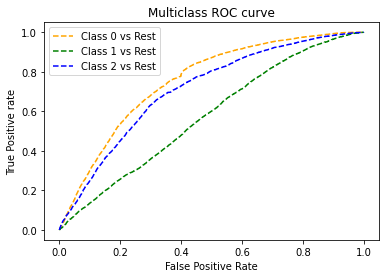

In [ ]:
# Evaluate the results
res=evaluate(multinomial,X_train_fs,y_train,X_test_fs,y_test,'Multinomial')
final_list.append(res)

All the 3 models under naive bayes give results worse than the baseline models. Hence we reject these models.
# **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
classifier_knn.fit(X_train_fs,y_train)

KNeighborsClassifier()

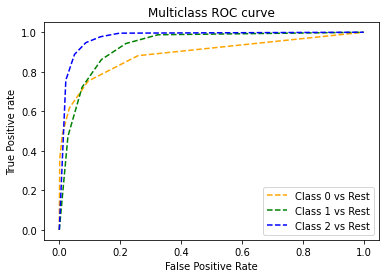

In [ ]:
# Evaluate the model
res=evaluate(classifier_knn,X_train_fs,y_train,X_test_fs,y_test,'KNN')
final_list.append(res)

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,5)}

In [ ]:
# Performing RandomSearch
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_fs,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([1, 2, 3, 4])})

In [ ]:
print("Best score is: ",knn_cv.best_score_)

Best score is:  0.8489663395130733


In [ ]:
print("Best Parameters are: ",knn_cv.best_params_)

Best Parameters are:  {'n_neighbors': 1}


----- Evaluation on train data -----

Confusion matrix 

[[43877    63    13]
 [   51 43888    14]
 [   19    19 43914]]

 Accuracy =  0.9986424790304722

 Recall =  0.9986424790304722

 Precision =  0.9986425957272561

 F1 score =  0.9986425181704389

 Roc_Auc score =  0.9989818604374777


----- Evaluation on test data -----

Confusion matrix 

[[ 7911  2137   940]
 [  594 10037   357]
 [  212   227 10550]]

 Accuracy =  0.8644926437130289

 Recall =  0.8644926437130289

 Precision =  0.8691433204128167

 F1 score =  0.8617318227432317

 Roc_Auc score =  0.8983680995918816


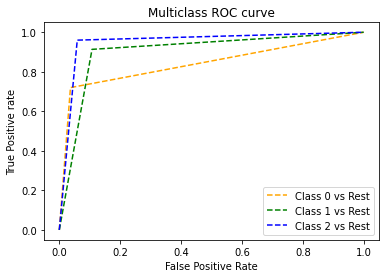

In [ ]:
# Evaluate results
res=evaluate(knn_cv,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_KNN')
final_list.append(res)

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_fs,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

----- Evaluation on train data -----

Confusion matrix 

[[43744   167    42]
 [  545 43309    99]
 [   85   170 43697]]

 Accuracy =  0.991597021037783

 Recall =  0.991597021037783

 Precision =  0.9916215934463036

 F1 score =  0.9915971982987337

 Roc_Auc score =  0.9998305262890259


----- Evaluation on test data -----

Confusion matrix 

[[9743 1011  234]
 [1528 8557  903]
 [ 314  723 9952]]

 Accuracy =  0.8570301835279842

 Recall =  0.8570301835279842

 Precision =  0.8566580737211135

 F1 score =  0.8563486212604393

 Roc_Auc score =  0.9544476786266743


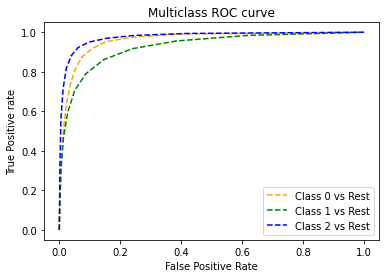

In [ ]:
# Evaluate results
res=evaluate(classifier_rf,X_train_fs,y_train,X_test_fs,y_test,'Random_Forest')
final_list.append(res)

In [ ]:
# Number of trees
n_estimators = [50,100]

# Maximum depth of trees
max_depth = [4,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

In [ ]:
#Random search
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)

In [ ]:
rf_random.fit(X_train_fs,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.1s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  10.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  10.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   9.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   9.8s
[CV] END max_depth=8, min_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100],
                                        'n_estimators': [50, 100]},
                   verbose=2)

In [ ]:
#The best esitmators
rf_random.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

----- Evaluation on train data -----

Confusion matrix 

[[33175  5716  5062]
 [12137 14063 17753]
 [ 6210  5503 32239]]

 Accuracy =  0.6027468943863854

 Recall =  0.6027468943863854

 Precision =  0.5952447193181833

 F1 score =  0.5841459574337716

 Roc_Auc score =  0.7933322592429484


----- Evaluation on test data -----

Confusion matrix 

[[8322 1443 1223]
 [3121 3431 4436]
 [1573 1408 8008]]

 Accuracy =  0.5994539663279236

 Recall =  0.5994539663279236

 Precision =  0.5904890297486579

 F1 score =  0.5801017921262293

 Roc_Auc score =  0.7879133745464227


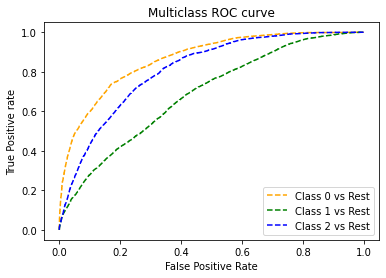

In [ ]:
# Evaluate results
res=evaluate(rf_optimal_model,X_train_fs,y_train,X_test_fs,y_test,'Hyper_Tuned_Random_Forest')

## **Logistic Regression:**

----- Evaluation on train data -----

Confusion matrix 

[[30614  5790  7549]
 [13557  9467 20929]
 [ 8062  5892 29998]]

 Accuracy =  0.531473251528159

 Recall =  0.531473251528159

 Precision =  0.515578290497917

 F1 score =  0.5043768925010258

 Roc_Auc score =  0.7176456756871911


----- Evaluation on test data -----

Confusion matrix 

[[7754 1428 1806]
 [3389 2340 5259]
 [2028 1492 7469]]

 Accuracy =  0.5327771879265888

 Recall =  0.5327771879265888

 Precision =  0.5158276089469317

 F1 score =  0.5050775870993396

 Roc_Auc score =  0.7202423289768146


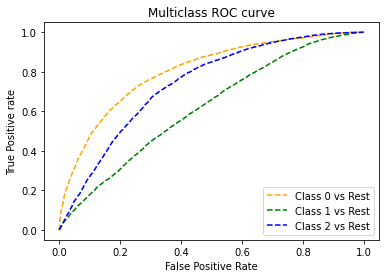

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit on the train set
logreg.fit(X_train_fs,y_train)

# Evaluate the results
res=evaluate(logreg,X_train_fs,y_train,X_test_fs,y_test,'Logistic_Regression')
final_list.append(res)

# **Catboost**

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 76.6 MB 56 kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train_fs,y_train,  
        eval_set=(X_test_fs,y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


----- Evaluation on train data -----

Confusion matrix 

[[42200  1487   266]
 [ 6724 26451 10778]
 [ 1330  5375 37247]]

 Accuracy =  0.8031215398383109

 Recall =  0.8031215398383109

 Precision =  0.8016841106183789

 F1 score =  0.7960524109875015

 Roc_Auc score =  0.9259078571204764


----- Evaluation on test data -----

Confusion matrix 

[[10411   498    79]
 [ 1722  6298  2968]
 [  364  1568  9057]]

 Accuracy =  0.7816168663734263

 Recall =  0.7816168663734263

 Precision =  0.7781104199451562

 F1 score =  0.7739639196225664

 Roc_Auc score =  0.9136749118720436


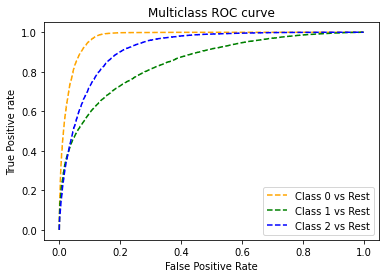

In [ ]:
# Evaluate the results
res=evaluate(clf2,X_train_fs,y_train,X_test_fs,y_test,'CatBoost')
final_list.append(res)

In [ ]:
All_model=pd.DataFrame(final_list)

In [ ]:
All_model

,MODEL_NAME,F1_SCORE_Train,PRECISION_Train,RECALL__Train,ACCURACY_Train,ROC_AUC_Train,F1_SCORE_Test,PRECISION_Test,RECALL__Test,ACCURACY_Test,ROC_AUC_Test
0,Decision_Tree_On_Under_Sampled_data,0.999122,0.999123,0.999122,0.999122,0.999998,0.484183,0.484999,0.483848,0.483848,0.612827
1,SVM_On_Under_Sampled_Data,0.505861,0.523580,0.536435,0.536435,0.722419,0.482963,0.505824,0.511938,0.511938,0.702560
2,Hypertuned_SVM_On_Under_Sampled_data,0.543274,0.554801,0.564355,0.564355,0.745428,0.508849,0.517580,0.527388,0.527388,0.706532
3,Decision_Tree,0.998658,0.998661,0.998658,0.998658,0.999998,0.798353,0.798693,0.798301,0.798301,0.849050
4,XGBoost,0.910872,0.914453,0.912284,0.912284,0.983318,0.837100,0.840600,0.840528,0.840528,0.947263
5,Gaussian,0.400402,0.475336,0.496102,0.496102,0.683046,0.401486,0.449746,0.498043,0.498043,0.684680
6,Bernoulli,0.391373,0.533784,0.488025,0.488025,0.638888,0.394756,0.556847,0.491885,0.491885,0.645636
7,Multinomial,0.389768,0.324899,0.487456,0.487456,0.677423,0.392518,0.327271,0.491006,0.491006,0.680021
8,KNN,0.873371,0.884491,0.876109,0.876109,0.980828,0.813045,0.826992,0.818019,0.818019,0.931594
9,Hyper_Tuned_KNN,0.998643,0.998643,0.998642,0.998642,0.998982,0.861732,0.869143,0.864493,0.864493,0.898368


<Figure size 1440x720 with 0 Axes>

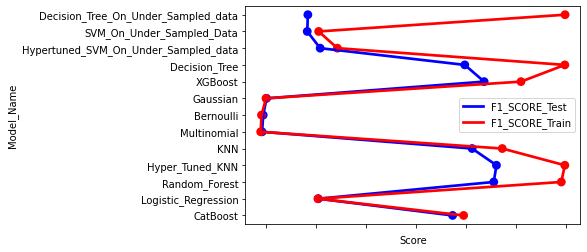

In [ ]:
ax=plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["F1_SCORE_Test"], y=All_model["MODEL_NAME"], color='b',alpha=0.2,labels=('F1_SCORE_Test'))
ax = sns.pointplot(x=All_model["F1_SCORE_Train"], y=All_model["MODEL_NAME"], color='r',alpha=0.7,labels=('F1_SCORE_Train'))
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["F1_SCORE_Test","F1_SCORE_Train"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# visulaizing illustration
plt.show()

<Figure size 1440x720 with 0 Axes>

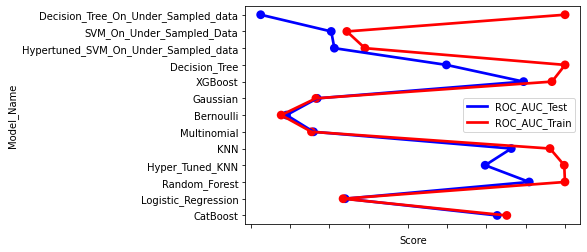

In [ ]:
plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=All_model["ROC_AUC_Test"], y=All_model["MODEL_NAME"], color='b',alpha=0.2)
ax = sns.pointplot(x=All_model["ROC_AUC_Train"], y=All_model["MODEL_NAME"], color='r',alpha=0.7)
# renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(All_model)+1], labels=["ROC_AUC_Test","ROC_AUC_Train"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
# visulaizing illustration
plt.show()

From the above plots we can observe that XG-Boost outperformed all the other models both for train as well as test.
# **Conclusion:**

In EDA, we observed that Email_Campaign_Type was the most important feature. If your Email_Campaign_Type was 1, there is a 90% likelihood of your Email to be read/acknowledged.

It was observed that both Time_Email_Sent and Customer_Location were insignificant in determining the Email_status. The ratio of the Email_Status was same irrespective of the demographic or the time frame the emails were sent on.

As the word_count increases beyond the 600 mark we see that there is a high possibility of that email being ignored. The ideal mark is 400-600. No one is interested in reading long mails !

For modelling, it was observed that for imbalance handling Oversampling i.e. SMOTE worked way better than undersampling as the latter resulted in a lot of loss of information.

Based on the metrics, XG Boost Classifier worked the best giving a train score of 89% and test score of 81% for F1 score.


